# Working on cleaning Education

In [1]:
import pandas as pd

In [2]:
data_path = "DATA/seda_metro_pool_cs_5.0.csv"

In [3]:
all_data = pd.read_csv(data_path)

In [4]:
all_data_filtered = all_data[all_data["subcat"] == "all"]

In [5]:
all_data_columns = all_data_filtered[["sedametroname", "tot_asmts", "cs_mn_avg_ol"]]

In [6]:
new_df = pd.DataFrame(columns=["City", "State", "Total_Tests", "Value"])

for row_tuple in all_data_columns.iterrows():
    row = row_tuple[1]
    place_string = row.iloc[0]
    total_tests = row.iloc[1]
    value = row.iloc[2]
    place_string_split_list = place_string.split(",")
    # print(place_string_split_list)
    
    new_row = pd.DataFrame([{
        "City": place_string_split_list[0],
        "State": place_string_split_list[1][1:3],
        "Total_Tests": total_tests,
        "Value": value
    }])

    new_df = pd.concat([new_df, new_row], ignore_index=True)
# new_df

C:\Users\poppy\AppData\Local\Temp\ipykernel_5660\1681756767.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df, new_row], ignore_index=True)


In [7]:
num = 200
new_df.sort_values('Total_Tests', ascending = False)[0:num].to_csv(f"DATA/EducationTop{num}.csv")

In [8]:
# Then I geocoded using ArcGIS Pro

In [9]:
geocoded = pd.read_csv("DATA/GeocodeEducationTop200.csv")

In [10]:
geocoded_cols = geocoded[["X","Y","USER_State","USER_City","USER_Total_Tests","USER_Value"]]
geocoded_cols

,X,Y,USER_State,USER_City,USER_Total_Tests,USER_Value
0,-84.383997,33.921383,GA,Atlanta-Sandy Springs-Roswell,9710351,0.030419
1,-73.754820,41.022040,NY,New York-Jersey City-White Plains,11202741,0.169141
2,-87.980458,42.082977,IL,Chicago-Naperville-Arlington Heights,11070519,0.017811
3,-111.926061,33.494909,AZ,Phoenix-Mesa-Scottsdale,7391817,-0.066809
4,-117.422940,33.914640,CA,Riverside-San Bernardino-Ontario,6891493,-0.325102
...,...,...,...,...,...,...
195,-83.829629,34.298772,GA,Gainesville,330659,-0.204094
196,-92.458867,44.019331,MN,Rochester,332728,0.297308
197,-83.612927,32.629188,GA,Warner Robins,330203,-0.002251
198,-119.116969,46.202607,WA,Kennewick-Richland,330549,-0.153653


In [11]:
for i in geocoded_cols:
    print(i)
    print(max(geocoded_cols[i]))
    print(min(geocoded_cols[i]))

X
-71.0586293
-157.858158
Y
61.216583
21.30992
USER_State
WV
AK
USER_City
Yuma
Akron
USER_Total_Tests
12406011
330203
USER_Value
0.48251001
-0.527739069


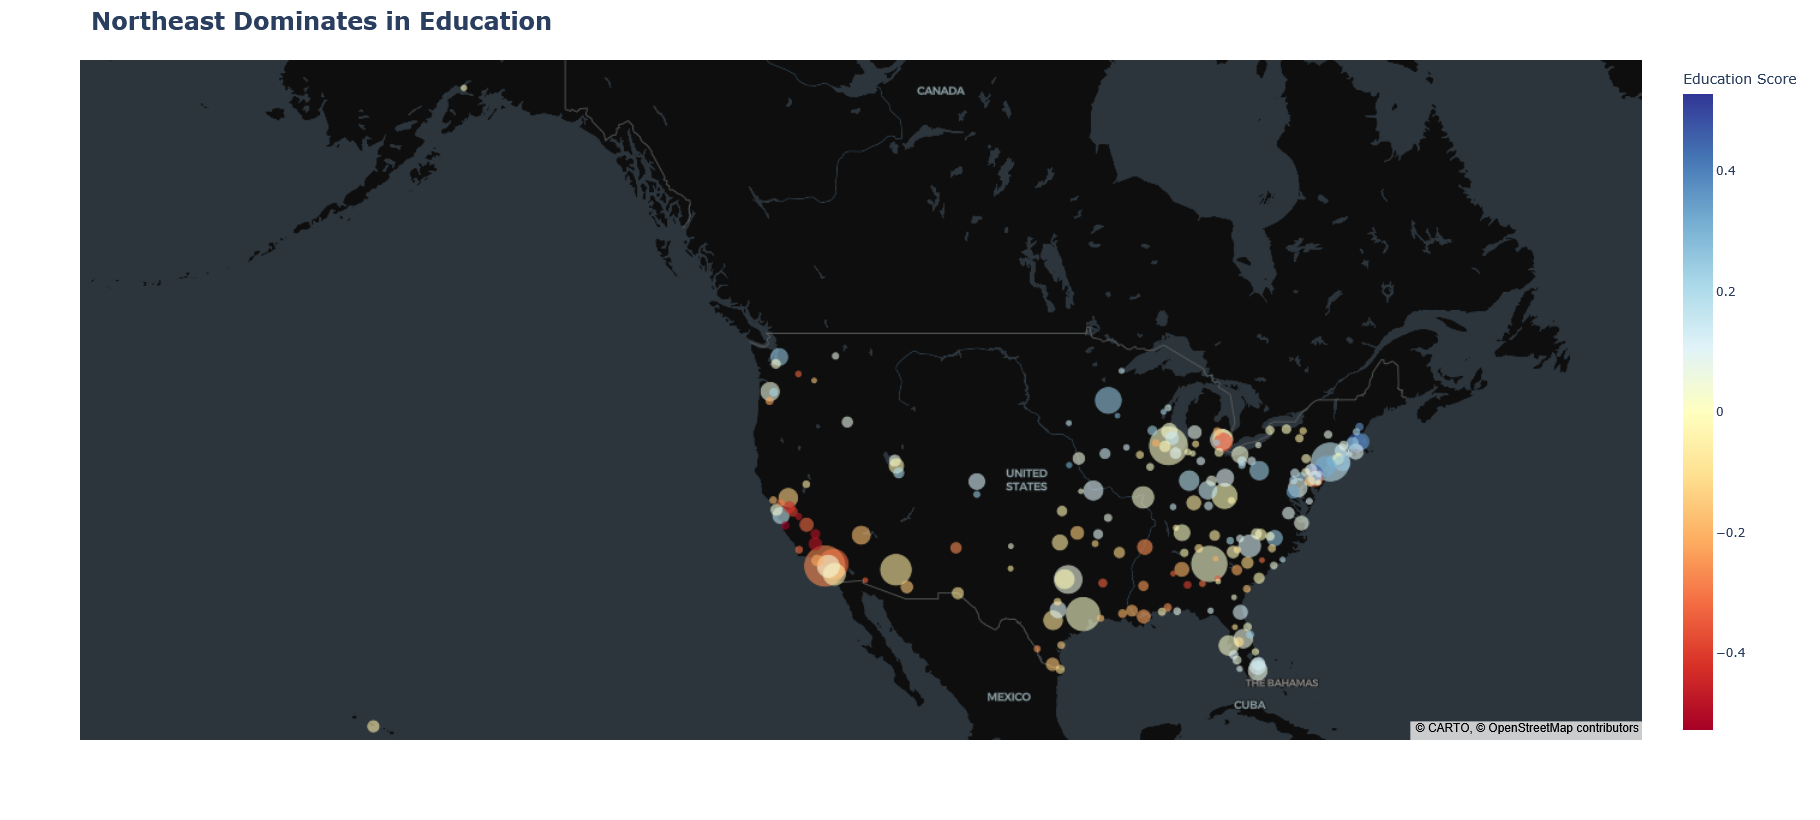

In [12]:
import plotly.express as px

# https://plotly.com/python-api-reference/generated/plotly.express.scatter_map.html

fig = px.scatter_map(
    geocoded_cols,
    lon="X",
    lat="Y",
    color="USER_Value", # color by above or below zero
    size="USER_Total_Tests", # size by test amount which is kind of relative to city size in population
    # plotly.express.colors.diverging suggested for diverging scales by docs
    # https://plotly.com/python/builtin-colorscales/#builtin-diverging-color-scales
    # specifically picked so colorblind people can see well
    color_continuous_scale="RdYlBu",
    color_continuous_midpoint = 0, # may need this for color continuous scale to work properly, seems close without but not exact
    size_max=30, # change this as needed for how html shows on web page
    zoom=3, # needs to include AK as well as HI because both have cities in this
    center = {'lat':45, 'lon':-115},
    opacity=0.6,
    hover_data={
        "USER_City": True,
        "USER_State": True,
        "USER_Total_Tests": True,
        "USER_Value": True,
        "X": False,
        "Y": False
    },
    labels={
        "USER_City":"City",
        "USER_State":"State",
        "USER_Total_Tests":"Total Tests",
        "USER_Value":"Education Score",
    },
    width = 1400,
    height = 820
)

fig.update_layout(
    map_style="carto-darkmatter", # gray is carto-positron but I want something darker so the middle marks can be seen better
    coloraxis_colorbar=dict(title="Education Score"),
)

fig.update_layout(
    title = {'text':"Northeast Dominates in Education", 'xanchor':'left', 'font':{'size':24,'weight':'bold'}}
)

fig.write_html("Top200EducationMap.html")

fig.show()

# Conclusion from this is that Northeast, North Midwest, and Northwest seem safe bets (except NOT Philadelphia or neighboring Camden.)
# Not the south and definitely not socal, SF area MAYBE
